Import lib ---

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('../data/LoanApprovalPrediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [27]:
# as lone_id is unique for every customer so it is not correlated to any so we drop it

df = df.drop('Loan_ID',axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dependents,586.0,0.755973,1.007751,0.0,0.0,0.0,1.75,3.0
ApplicantIncome,598.0,5292.252508,5807.265364,150.0,2877.5,3806.0,5746.00,81000.0
CoapplicantIncome,598.0,1631.499866,2953.315785,0.0,0.0,1211.5,2324.00,41667.0
LoanAmount,577.0,144.968804,82.704182,9.0,100.0,127.0,167.00,650.0
Loan_Amount_Term,584.0,341.917808,65.205994,12.0,360.0,360.0,360.00,480.0
Credit_History,549.0,0.843352,0.363800,0.0,1.0,1.0,1.00,1.0


In [29]:
df.describe(include='O').T

,count,unique,top,freq
Gender,598,2,Male,487
Married,598,2,Yes,388
Education,598,2,Graduate,465
Self_Employed,598,2,No,488
Property_Area,598,3,Semiurban,225
Loan_Status,598,2,Y,411


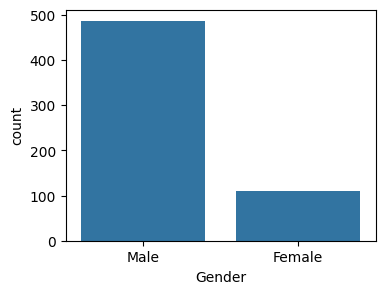

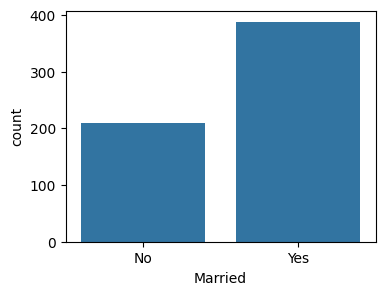

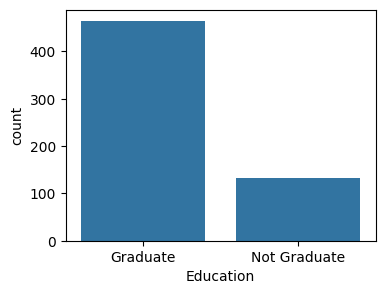

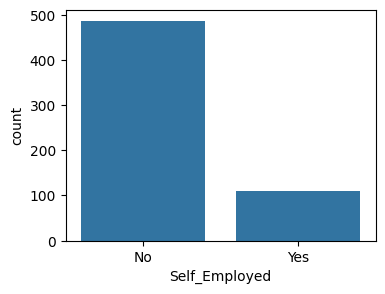

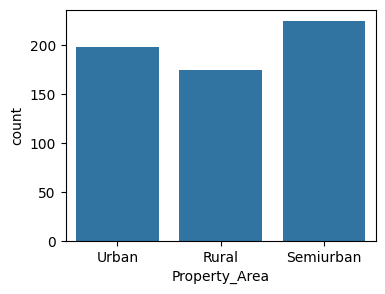

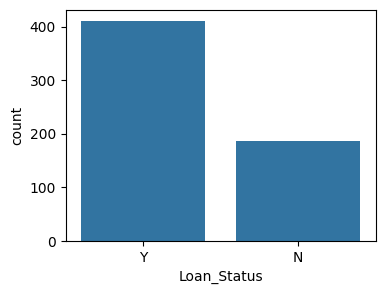

In [ ]:
for i in df.columns:
    if df[i].dtype == 'object':
        plt.figure(figsize=(4,3))
        sns.countplot(x=i,data=df)